# PNEUMONIA

**Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it.
The infection causes inflammation in the air sacs in your lungs, which are called alveoli. The alveoli fill with fluid or pus, making it difficult to breathe.**

#  Is pneumonia contagious?

**The germs that cause pneumonia are contagious. This means they can spread from person to person.
Both viral and bacterial pneumonia can spread to others through inhalation of airborne droplets from a sneeze or cough. You can also get these types of pneumonia by coming into contact with surfaces or objects that are contaminated with pneumonia-causing bacteria or viruses.
You can contract fungal pneumonia from the environment. However, it doesn’t spread from person to person.**

# Symptoms of pneumonia

**Pneumonia symptoms can be mild to life-threatening. They can include:**

*     coughing that may produce phlegm (mucus)
*     fever
*     sweating or chills
*     shortness of breath that happens while doing normal activities or even while resting
*     chest pain that’s worse when you breathe or cough
*     feelings of tiredness or fatigue
*     loss of appetite
*     nausea or vomiting
*     headaches

**Other symptoms can vary according to your age and general health:**

*     Children under 5 years old may have fast breathing or wheezing.
*     Infants may appear to have no symptoms, but sometimes they may vomit, lack energy, or have trouble drinking or eating.
*     Older people may have milder symptoms. They can also exhibit confusion or a lower than normal body temperature.

# There are several types of infectious agents that can cause pneumonia.

# Bacterial pneumonia

**The most common cause of bacterial pneumonia is Streptococcus pneumoniae. Other causes include:**

*     Mycoplasma pneumoniae
*     Haemophilus influenzae
*     Legionella pneumophila

# Viral pneumonia

**Respiratory viruses are often the cause of pneumonia. Some examples include:**

*     influenza (flu)
*     respiratory syncytial virus (RSV)
*     rhinoviruses (common cold)

# Fungal pneumonia

**Fungi from soil or bird droppings can cause pneumonia. They most often cause pneumonia in people with weakened immune systems. Examples of fungi that can cause pneumonia include:**

*     Pneumocystis jirovecii
*     Cryptococcus species
*     Histoplasmosis species

# If you like please upvote

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2

## Input data files are available in the "../input/" directory.
## For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [ ]:
import os
print(os.listdir("../input"))

['chest-xray-pneumonia']


In [ ]:
DIR = os.listdir('../input/chest-xray-pneumonia/chest_xray')
print(DIR)

['chest_xray', '__MACOSX', 'val', 'test', 'train']


## train, test, validation folder

In [ ]:
train_folder = '../input/chest-xray-pneumonia/chest_xray/train'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test'
val_folder = '../input/chest-xray-pneumonia/chest_xray/val'

## import visualization package

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [ ]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 256 # resize image

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

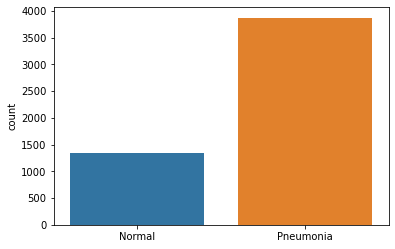

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")

sns.countplot(l)

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

# Noramalization

In [ ]:
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_test = np.array(X_test) / 255.0

In [ ]:
X_test.shape

(624, 256, 256)

# reshape train, test and validation

In [ ]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

# Load important packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D ,AveragePooling2D
from tensorflow.keras.models import Sequential

# Training the Model

In [ ]:
X_train.shape

(5216, 256, 256, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.8))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True, callbacks=[callback])
scores = model.evaluate(X_test, y_test)

model.save("cnn_model.bin")

Epoch 1/5
163/163 [==============================] - 593s 4s/step - loss: 0.5074 - accuracy: 0.7492 - val_loss: 0.6514 - val_accuracy: 0.5625
Epoch 2/5
163/163 [==============================] - 600s 4s/step - loss: 0.2950 - accuracy: 0.8855 - val_loss: 0.5659 - val_accuracy: 0.7500
Epoch 3/5
163/163 [==============================] - 595s 4s/step - loss: 0.2110 - accuracy: 0.9156 - val_loss: 0.4899 - val_accuracy: 0.8125
Epoch 4/5
163/163 [==============================] - 595s 4s/step - loss: 0.1799 - accuracy: 0.9298 - val_loss: 0.4420 - val_accuracy: 0.8125
Epoch 5/5
20/20 [==============================] - 18s 919ms/step - loss: 0.3733 - accuracy: 0.8462


In [ ]:
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

Test loss 0.3664141297340393
Test accuracy 0.8205128312110901


In [ ]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
# predict classes

prediction = model.predict_classes(X_test)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

In [ ]:
# correct and incorrect
# you can check tensorflow website

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

# Visualize some correct

In [ ]:
j = 0
for i in correct[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

# Some inccorect visualization

In [ ]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

In [ ]:
# load model and predict some some external photo

labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("cnn_model.bin") # load model

In [ ]:
# extra pneumonia photo from google
prediction = model.predict([prepare("../input/images/left-lower-lobe-pneumonia.jpg")])
print(labels[int(prediction[0])])

In [ ]:
# extra normal x-ray photo from google
prediction = model.predict([prepare("../input/images/normal.jpeg")])
print(labels[int(prediction[0])])

In [ ]:
prediction = model.predict([prepare("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")])
print(labels[int(prediction[0])])

In [ ]:
prediction = model.predict([prepare("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg")])
print(labels[int(prediction[0])])

# If you like, please upvote